In [1]:
car.data <- read.table("car.all", sep = '\t', header = FALSE)

In [2]:
head(car.data)

V1,V2,V3,V4,V5,V6
NIKPRLRSP117970_09122005,05: PR,1812,-0.032215954,0.7104365,1.197325e-34
NIKPRLRSP268833_14122010,05: PR,4548,0.051956540,0.5309466,3.505952e-17
NIKPRLRSP230282_07092009,01: Product,6701,-0.007882342,0.8871740,3.719157e-74
NIKPRLRSP232556_30092009,04: Contract,9501,-0.011217690,0.5214358,1.579957e-16
NIKPRLRSP179349_17012008,01: Product,4967,0.024352662,0.4886435,2.008476e-14
NIKPRLRSP206756_02122008,06: Order,6503,-0.022813152,0.8260632,1.872039e-55


## 新しいマッチングでの全体的な傾向

In [3]:
car.val <- as.numeric(as.character(car.data$V4)) * 100
length(car.val)
head(car.val, n = 100)

[1] 27840

[1] -3.2215954  5.1956540 -0.7882342 -1.1217690  2.4352662 -2.2813152
  [7]  3.2657402  1.6561281  0.5389121 -1.6273157  3.0535835 -0.9929621
 [13]  0.4862938 -0.1922352  0.8111386  0.4667490  1.6999143  1.9124231
 [19]  1.2031106 -1.1522240 -3.9547187  0.2490675 -1.0168287  6.0024939
 [25]  2.2490543 -2.9446930 -8.0152636  9.3223919 -1.4860515  0.8206760
 [31] -2.4423663 -1.0351867  3.8749094 21.6461001  2.9271095 -0.4981451
 [37] -2.9350147  4.7731439 -0.4321511  1.1919588 -0.1175822  5.2160980
 [43]  0.8439451 -8.9894698 -1.4485348  1.2293931 22.1655032 -2.7188746
 [49] -2.9402365 -0.7934023  1.8080582 -1.9398628  3.8471647 -4.4949169
 [55] -0.9303856 -1.9381875 -7.2587547  0.3372578  2.1370387 -1.7889660
 [61] -1.7617956 -0.7197535  7.4200826 -0.4016687  1.3431812  0.9737605
 [67] -0.2284822  0.4106909  2.7047852 -1.5550397 -0.3524771  1.7952011
 [73]  3.7807995 -3.8217465 -1.8204618 -2.5146335  0.3015674 -0.5373102
 [79] -3.2154262  1.2774875 -0.2765254 -3.2071067 -1.8455090  3.7945431
 [85] -0.3592033 -1.4854257 -2.6836126 -1.9165520 -1.3572499  1.5748878
 [91]  0.6491405 -1.6406254 -1.1318450 -0.5192093  2.3301356  2.6262983
 [97]  0.6924004  0.4889768  0.5130912 -2.3518018

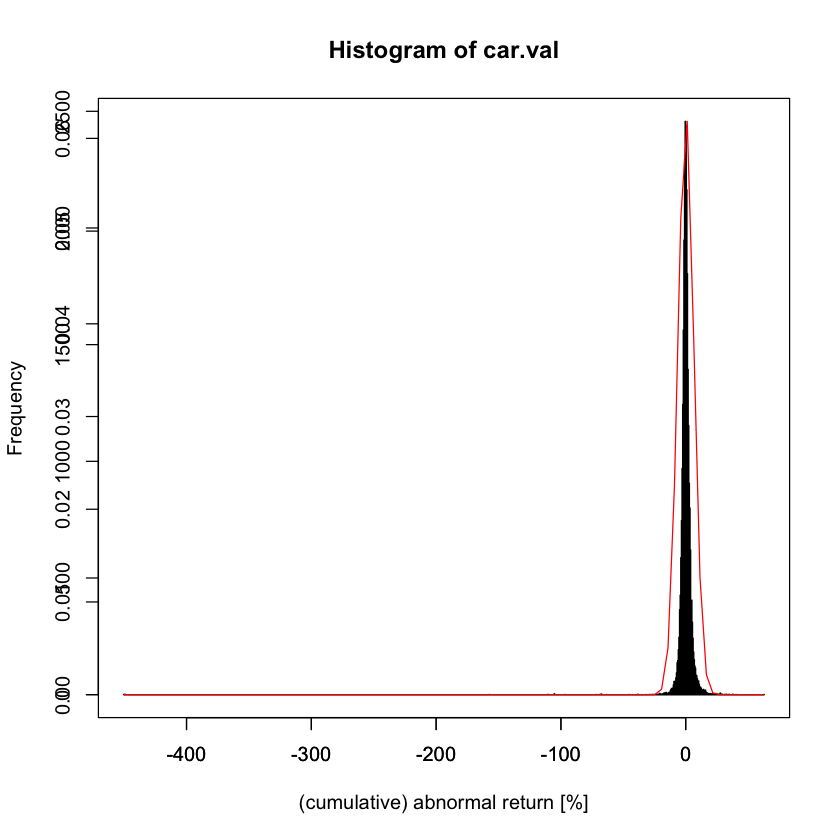

In [4]:
hist(car.val, breaks = 1000, xlim = c(min(car.val),max(car.val)), xlab = "(cumulative) abnormal return [%]")
par(new=T)
curve(dnorm(x, mean=mean(car.val), sd=sqrt(var(car.val))), from=min(car.val), to=max(car.val), col="red", xlab="", ylab="")   # 正規分布を重ね書き

-> 低いCARが無くなったように見えるが、maxが増えただけでminは昔のマッチングと変わっていない。

In [5]:
mean(car.val)

[1] 0.07090927

In [6]:
t.test(car.val)


	One Sample t-test

data:  car.val
t = 1.8626, df = 27839, p-value = 0.06253
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.00371153  0.14553007
sample estimates:
 mean of x 
0.07090927 


-> 全体的に見ると平均は0%と見なして良さそう

In [7]:
sd(car.val)

[1] 6.35225

In [8]:
max(car.val)
min(car.val)

[1] 62.72805

[1] -450.1059

In [9]:
length(car.val)

[1] 27840

In [10]:
length(car.val[car.val >= 10.])
length(car.val[car.val <= -10.])

[1] 418

[1] 237

-> 前のマッチングと比べて、0に近い値の割合が増えた。また、平均値はわずかに正方向に移動し、分散もわずかに大きくなった。

In [11]:
# 両側それぞれ0.1%ずつのデータを除去
trim.min <- sort(car.val)[length(car.val) * 0.001]
trim.max <- sort(car.val)[length(car.val) * 0.999]
trim.min
trim.max
mean(car.val[trim.min <= car.val & car.val <= trim.max])

[1] -24.42839

[1] 25.42001

[1] 0.1464747

## プレスリリースのタイプごとの傾向

In [12]:
types <- c('04: Restructuring', '05: PR', '01: Product', '05: Price', '05: Promotion', '10: Exit', '04: License', '03: Technology', '06: Capacity', '04: Alliance', '06: Order', '04: Contract', '02: Process', '04: M&A')

In [13]:
car.data.type <- car.data[car.data$V2 == '01: Product',]

In [14]:
head(car.data.type)

,V1,V2,V3,V4,V5,V6
3,NIKPRLRSP230282_07092009,01: Product,6701,-0.007882342,0.8871740,3.719157e-74
5,NIKPRLRSP179349_17012008,01: Product,4967,0.024352662,0.4886435,2.008476e-14
10,NIKPRLRSP186444_08042008,01: Product,8591,-0.016273157,0.7228119,2.334638e-36
12,NIKPRLRSP178189_21122007,01: Product,4208,-0.009929621,0.5607634,2.269876e-19
13,NIKPRLRSP188065_30042008,01: Product,5261,0.004862938,0.3683278,2.240535e-08
15,NIKPRLRSP205551_18112008,01: Product,4689,0.008111386,0.5282535,5.395546e-17


In [15]:
quantile(car.data.type$V4)

0%           25%           50%           75%          100% 
-4.5010593949 -0.0156154214 -0.0002311702  0.0158698006  0.4016851408

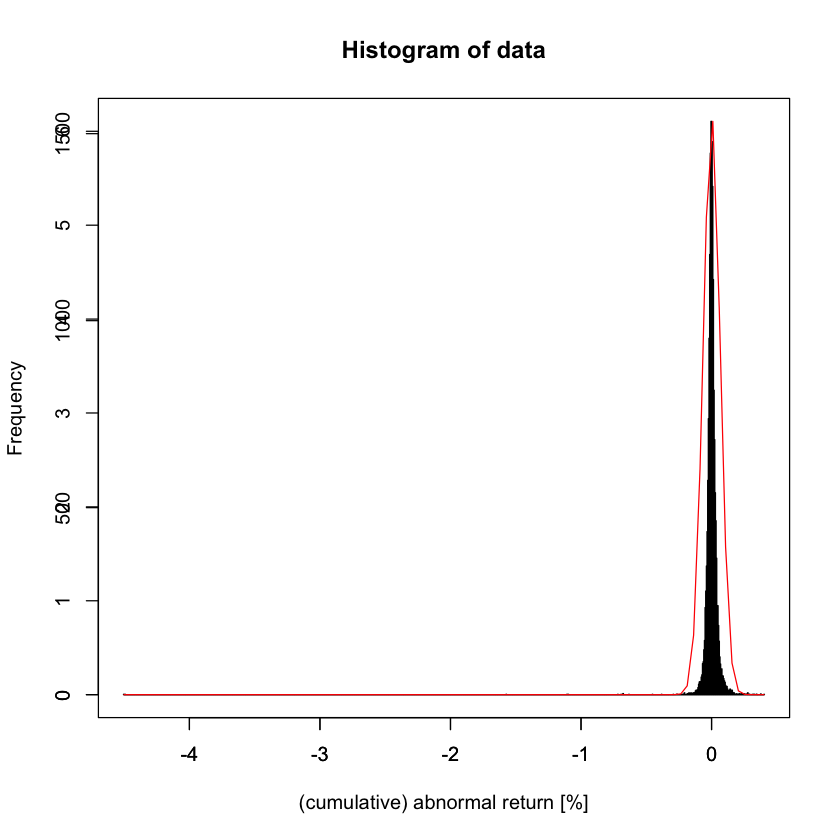

In [18]:
print.result(car.data.type$V4)

In [17]:
print.result <- function(data) {
    hist(data, breaks = 1000, xlim = c(min(data),max(data)), xlab = "(cumulative) abnormal return [%]")
    par(new=T)
    curve(dnorm(x, mean=mean(data), sd=sqrt(var(data))), from=min(data), to=max(data), col="red", xlab="", ylab="")   # 正規分布を重ね書き
}

In [19]:
car.types <- list()
for (type in sort(types)) {
    car.val.type <- as.numeric(as.character(car.data[car.data$V2 == type,]$V4)) * 100
    #print(c(t, length(car.val.type), mean(car.val.type), sd(car.val.type), min(car.val.type), max(car.val.type)))
    #print(list(c(t, length(car.val.type), mean(car.val.type), sd(car.val.type), min(car.val.type), max(car.val.type))))
    pv <- t.test(car.val.type)$p.value
    car.types <- c(car.types, list(c(type, length(car.val.type), mean(car.val.type), pv, sd(car.val.type), min(car.val.type), max(car.val.type))))
}
Unzip <- function(...) rbind(data.frame(), ...)
car.frame <- do.call(Unzip, car.types)
colnames(car.frame) <- c("prtype", "num", "mean[%]", "p-value (mean != 0)", "sd", "min", "max")
#car.frame

# print histgram
#for (t in sort(types)) {
#    car.val.type <- as.numeric(car.data[car.data$V2 == t,]$V4) * 100
#    print.result(car.val.type)
#}

In [20]:
car.frame[order(as.numeric(as.character(car.frame$"mean[%]")), decreasing = TRUE),]

,prtype,num,mean[%],p-value (mean != 0),sd,min,max
11,05: Promotion,20,0.74231243060715,0.288159155050597,3.03790871825636,-4.31908542771,5.69873573604
2,02: Process,491,0.345755556309737,0.0445718781790272,3.80437930914385,-14.5563082726,32.8957208012
12,06: Capacity,1431,0.291821195543332,0.00360900895478929,3.78665657292487,-17.1980552085,24.2508205792
8,04: Restructuring,228,0.265000421901194,0.270908713014061,3.62558601370102,-12.041890539,17.5582828742
6,04: License,271,0.238718259733001,0.262264409849642,3.49812118834502,-11.5261148231,16.8600242711
5,04: Contract,1018,0.21856696884584,0.0825606564729016,4.01305845635978,-38.1125079952,28.7397132309
7,04: M&A,392,0.199926003713138,0.337217206098682,4.11958009982321,-13.4608510945,35.4888599452
3,03: Technology,1725,0.175531139223477,0.0322233163934298,3.40135873241184,-20.9610674536,18.4618805001
10,05: Price,112,0.132924265994909,0.728205265551342,4.03779599915689,-11.9792427275,24.2508205792
1,01: Product,16854,0.0493919550950251,0.321745932304766,6.47106041821733,-450.105939494,40.1685140788


平均値でソートしたもの。大事そうなタイプから並んでいたりする。。？

"01: Product"は全体的に見るとほぼ影響なしとなっている

p値は多重検定補正はしていない

In [21]:
car.data$V4 <- as.numeric(as.character(car.data$V4))

In [22]:
car.data[car.data$V4 < -5,]

V1,V2,V3,V4,V5,V6


### 企業ごとのCARは？